In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from helper_functions import plot_supervised_model

In this part we'll look at support vector machines and how it performs compared with the previous model we trained (logistic regression) for the same number of features and the same train/test split. 

At the end, we'll introduce and discuss a concept called cross validation, which allows us to better evaluate our model and avoid a common problem known as model overfitting.

Again, we load the iris dataset.

In [2]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

#### More about Support Vector Machines

(Feel free to skip these details)

Support Vector Machines is a complicated title for a fairly simple concept.

It comes down to finding a hyperplane which separates our items into two classes (hyperplane as opposed to line/curve because we can work in a number of dimensions - the number of dimensions depends on the number of features). Look below for how we use this to classify more than 2 classes.

The kernel (or function) specifies which shape of hyperplane is used. For our Iris data set, we used a linear kernel, which means we are linearly separating our items for classification.

---

This might help you envision this on a 2-dimensional level:

Imagine an X-Y plane, with a bunch of dots representing data points scattered across the plan. In this X-Y plane, we only have dots which belong to one of two classes. We want to separate the dots by their class and we plan to use a line to do that. On one side of the line, we should have all the dots representing one class and on the other we should have the other class.

Small problem, though, our data isn't that simple to split. We can't find a line which puts all dots from one class on one side and all from another class on the other side. Some of our dots are mixed in with dots from the other class.

That's fine. Our model just tries to do its best and pick the best line which breaks up the dots as best as possible into two classes. Some dots will be misclassified, but as long as most aren't, we're still doing well. We also want to make sure that line is generalizable enough.

---
Okay, sounds great for separating items into two classes, but what happens if you have multiple classes, like we do in our iris example?

SVMs, like traditional Logisitic Regression models, are meant for binary classification, but they can also be used in multiclass cases.

We again use "one-versus-the-rest" to see which class has the greatest margin classification for the item. Which class the item seems to best fit into. Then we return that as the item's class.

### Support Vector Machines

In [7]:
model = SVC(kernel='linear')

Use the first two features (sepal width and length)

In [8]:
X_sub = X[:, :2]

Separate the data into training and test sets using a 80/20 split.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

Train the model and predict the labels for this new model.<br />

(Note: All of our code so far, except `model = SVC(kernel='linear')` has been identical to the code for Logistic Regression. That's the great thing about using Scikit-learn'. It is easy to swap out models, so you can focus on what the right model is, as opposed to the implementation.)

In [10]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

What is the accuracy of this new model

In [11]:
accuracy_score(y_test, y_pred)

0.90000000000000002

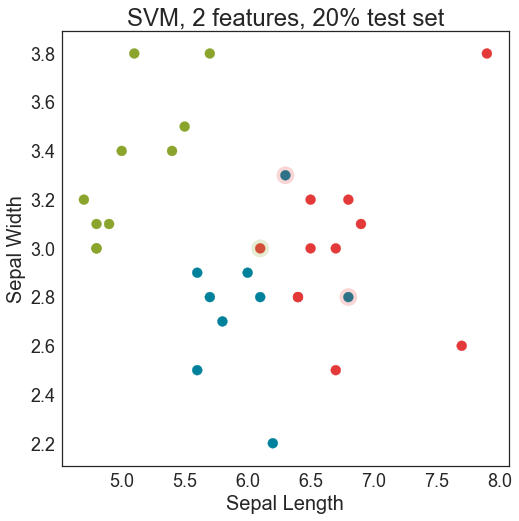

In [7]:
plot_supervised_model('SVM, 2 features, 20% test set', model, X_test, y_test, y_pred)

What is the accuracy of the support vector machine classifier with 3 features?

In [12]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

In [15]:
plot_supervised_model('SVM, 3 features, 20% test set', model, X_test, y_test, y_pred)

NameError: name 'plot_supervised_model' is not defined

#### Overfitting and Cross Validation

There's a common problem that happens when building models. It's called _overfitting_.

The goal of a model is to learn generalizations from a training set of data and use these generalizations to predict future unknown examples.

Our generalizations are only as good as the diversity of our training set/previous examples. Overfitting happens when you learn too much from a specific set of examples, in a way that makes them worse generalizations for unseen data.

This can easily happen if we always use the same training and test sets. We can get really good at learning exactly the right coefficients and parameters for our models, so that we always do well on our test set. Then when we get unseen data in the future, we perform terribly, because the data are not similar to the test set we worked with.

This is where cross validation can come in.

With cross validation, we use the same data, but work with several train/test splits of that data. We average the accuracy across all runs with these different train/test splits and use that as the accuracy of our model. By using different splits, we get a more diverse set of test sets and it is more likely that our learned model can handle more diverse examples in the future.

Cross validation allows us to make more use of the data we have, and create better generalizing models, without having to collect significantly more data (though of course, the more examples you have, the better!)

**We use the `cross_val_score` to compute the cross-validation accuracy score of model). See how it compares to previous accuracy scores.**

In [12]:
cross_val_score(model, X_sub, y, cv=5)

array([ 0.96666667,  1.        ,  0.9       ,  0.93333333,  0.96666667])